### Data Loading and Merging

In [23]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora, models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
nltk.download('punkt')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# ! pip install textblob
from textblob import TextBlob
from gensim.models import CoherenceModel
from gensim.models import TfidfModel
import re

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/giteshbibra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giteshbibra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/giteshbibra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [56]:
# Load the data files
jeep_avenger = pd.read_csv('CA-Jeep Avenger/comments_JeepAvenger.csv')
hyundai_kona = pd.read_csv('CA-Hyundai Kona/comments_HyundaiKona.csv')
peugeot_e2008 = pd.read_csv('CA-Peugeot e2008/comments_Peugeot_e2008.csv')
vauxhall_mokka=pd.read_csv('CA-Vauxhall Mokka/comments_Vauxhall_Mokka_EV.csv')
mini_cooper=pd.read_csv('CA-MiniCooper EV/comments_MiniCooper_EV.csv')


In [57]:
# jeep_avenger.head()
# hyundai_kona.head()
# peugeot_e2008.head()
# vauxhall_mokka.head()
mini_cooper.head()

,Timestamp,Username,VideoID,Comment,Date
0,2024-07-23T15:19:10Z,@raider7966,Las92RDdkOM,Sorry not sure what they were thinking with th...,2024-07-23T15:19:10Z
1,2024-07-15T16:47:45Z,@jackdaniels2905,Las92RDdkOM,Heating and cooling controls need to be physic...,2024-07-15T16:47:45Z
2,2024-06-20T21:51:48Z,@pqvid,Las92RDdkOM,You know how you can control the regen? With y...,2024-06-20T21:51:48Z
3,2024-06-19T19:54:27Z,@silverlover5817,Las92RDdkOM,Thanks for the video. All the videos I have se...,2024-06-19T19:54:27Z
4,2024-07-27T11:34:59Z,@Sc0oby26th,Las92RDdkOM,Err.....it's electric,2024-07-27T11:34:59Z


In [58]:
# Add a column for the car model in each dataset
jeep_avenger['Car'] = 'Jeep Avenger'
hyundai_kona['Car'] = 'Hyundai Kona'
peugeot_e2008['Car'] = 'Peugeot e2008'
vauxhall_mokka['Car'] = 'Vauxhall Mokka'
mini_cooper['Car'] = 'Mini Cooper'

In [59]:
# jeep_avenger.head()
# hyundai_kona.head()
# peugeot_e2008.head()
# vauxhall_mokka.head()
mini_cooper.head()

,Timestamp,Username,VideoID,Comment,Date,Car
0,2024-07-23T15:19:10Z,@raider7966,Las92RDdkOM,Sorry not sure what they were thinking with th...,2024-07-23T15:19:10Z,Mini Cooper
1,2024-07-15T16:47:45Z,@jackdaniels2905,Las92RDdkOM,Heating and cooling controls need to be physic...,2024-07-15T16:47:45Z,Mini Cooper
2,2024-06-20T21:51:48Z,@pqvid,Las92RDdkOM,You know how you can control the regen? With y...,2024-06-20T21:51:48Z,Mini Cooper
3,2024-06-19T19:54:27Z,@silverlover5817,Las92RDdkOM,Thanks for the video. All the videos I have se...,2024-06-19T19:54:27Z,Mini Cooper
4,2024-07-27T11:34:59Z,@Sc0oby26th,Las92RDdkOM,Err.....it's electric,2024-07-27T11:34:59Z,Mini Cooper


In [60]:
# Ensure the timestamp column is in a proper datetime format
# jeep_avenger['Timestamp'] = pd.to_datetime(jeep_avenger['Timestamp'])
# hyundai_kona['Timestamp'] = pd.to_datetime(hyundai_kona['Timestamp'])
# peugeot_e2008['Timestamp'] = pd.to_datetime(peugeot_e2008['Timestamp'])
# vauxhall_mokka['Timestamp'] = pd.to_datetime(vauxhall_mokka['Timestamp'])
# mini_cooper['Timestamp'] = pd.to_datetime(mini_cooper['Timestamp'])

In [61]:
# Merge the datasets
combined_data = pd.concat([jeep_avenger, hyundai_kona, peugeot_e2008,vauxhall_mokka,mini_cooper])

# Sort the combined dataset by timestamp
# combined_data = combined_data.sort_values(by='Timestamp')


In [62]:
combined_data


,Timestamp,Username,VideoID,Comment,Date,Car
0,2024-05-23T11:35:19Z,@SirKelvin,B4pWH-80vRw,You spent more time praising the car like you ...,2024-05-23T11:35:19Z,Jeep Avenger
1,2024-05-18T10:40:45Z,@crowninterior_ldn6971,B4pWH-80vRw,No one talks about how you move the seat. Whet...,2024-05-18T10:40:45Z,Jeep Avenger
2,2024-07-02T21:29:54Z,@sandracampbell4579,B4pWH-80vRw,"It’s manual,and another review states the ster...",2024-07-02T21:31:47Z,Jeep Avenger
3,2024-03-27T17:18:13Z,@Alfacinhadesign,B4pWH-80vRw,Where is the rails for bars? :(,2024-03-27T17:18:13Z,Jeep Avenger
4,2024-03-18T17:11:53Z,@darkobrodski1453,B4pWH-80vRw,Im thinking about buying petrol version of Jee...,2024-03-18T17:11:53Z,Jeep Avenger
...,...,...,...,...,...,...
2174,2024-05-07T22:14:47Z,@stevenjones916,RAtwyLFvmcc,Looks awful.,2024-05-07T22:14:47Z,Mini Cooper
2175,2024-05-07T22:08:25Z,@robnelsonbayvillage,RAtwyLFvmcc,Yellow is the faster color. Love your work. I ...,2024-05-07T22:08:25Z,Mini Cooper
2176,2024-05-07T22:06:19Z,@bill_heywood,RAtwyLFvmcc,Could have stayed in the UK to drive in pourin...,2024-05-07T22:07:49Z,Mini Cooper
2177,2024-05-08T04:56:40Z,@JamesSleeman,RAtwyLFvmcc,"Because you can't fit a camera, and a Manos, ...",2024-05-08T04:56:40Z,Mini Cooper


### Data Cleaning

In [63]:
combined_data.rename(columns={'VideoID': 'ID', 'Comment': 'Text'}, inplace=True)
combined_data.head()

,Timestamp,Username,ID,Text,Date,Car
0,2024-05-23T11:35:19Z,@SirKelvin,B4pWH-80vRw,You spent more time praising the car like you ...,2024-05-23T11:35:19Z,Jeep Avenger
1,2024-05-18T10:40:45Z,@crowninterior_ldn6971,B4pWH-80vRw,No one talks about how you move the seat. Whet...,2024-05-18T10:40:45Z,Jeep Avenger
2,2024-07-02T21:29:54Z,@sandracampbell4579,B4pWH-80vRw,"It’s manual,and another review states the ster...",2024-07-02T21:31:47Z,Jeep Avenger
3,2024-03-27T17:18:13Z,@Alfacinhadesign,B4pWH-80vRw,Where is the rails for bars? :(,2024-03-27T17:18:13Z,Jeep Avenger
4,2024-03-18T17:11:53Z,@darkobrodski1453,B4pWH-80vRw,Im thinking about buying petrol version of Jee...,2024-03-18T17:11:53Z,Jeep Avenger


In [64]:
len(combined_data)

6374

In [65]:
combined_data = combined_data.drop(columns=['Username','ID'])


In [66]:
combined_data.head()

,Timestamp,Text,Date,Car
0,2024-05-23T11:35:19Z,You spent more time praising the car like you ...,2024-05-23T11:35:19Z,Jeep Avenger
1,2024-05-18T10:40:45Z,No one talks about how you move the seat. Whet...,2024-05-18T10:40:45Z,Jeep Avenger
2,2024-07-02T21:29:54Z,"It’s manual,and another review states the ster...",2024-07-02T21:31:47Z,Jeep Avenger
3,2024-03-27T17:18:13Z,Where is the rails for bars? :(,2024-03-27T17:18:13Z,Jeep Avenger
4,2024-03-18T17:11:53Z,Im thinking about buying petrol version of Jee...,2024-03-18T17:11:53Z,Jeep Avenger


In [67]:
# Adjust 'Comment' column to lowercase
combined_data['Text'] = combined_data['Text'].str.lower()
combined_data.head()

,Timestamp,Text,Date,Car
0,2024-05-23T11:35:19Z,you spent more time praising the car like you ...,2024-05-23T11:35:19Z,Jeep Avenger
1,2024-05-18T10:40:45Z,no one talks about how you move the seat. whet...,2024-05-18T10:40:45Z,Jeep Avenger
2,2024-07-02T21:29:54Z,"it’s manual,and another review states the ster...",2024-07-02T21:31:47Z,Jeep Avenger
3,2024-03-27T17:18:13Z,where is the rails for bars? :(,2024-03-27T17:18:13Z,Jeep Avenger
4,2024-03-18T17:11:53Z,im thinking about buying petrol version of jee...,2024-03-18T17:11:53Z,Jeep Avenger


In [68]:
# Remove emojis 
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [69]:
# Remove punctuation 
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Apply the functions to the 'Comment' column
combined_data['Text'] = combined_data['Text'].apply(remove_emojis).apply(remove_punctuation)

In [70]:
combined_data.head()

,Timestamp,Text,Date,Car
0,2024-05-23T11:35:19Z,you spent more time praising the car like you ...,2024-05-23T11:35:19Z,Jeep Avenger
1,2024-05-18T10:40:45Z,no one talks about how you move the seat wheth...,2024-05-18T10:40:45Z,Jeep Avenger
2,2024-07-02T21:29:54Z,its manualand another review states the stereo...,2024-07-02T21:31:47Z,Jeep Avenger
3,2024-03-27T17:18:13Z,where is the rails for bars,2024-03-27T17:18:13Z,Jeep Avenger
4,2024-03-18T17:11:53Z,im thinking about buying petrol version of jee...,2024-03-18T17:11:53Z,Jeep Avenger


In [71]:
# Split the 'Timestamp' into 'Date' and 'Time' and keep only the 'Date'
combined_data['Date'] = combined_data['Timestamp'].str.split('T', expand=True)[0]

# Move 'Date' to the first column
cols = ['Date'] + [col for col in combined_data.columns if col != 'Date']
combined_data = combined_data[cols]

# Drop the 'Timestamp' 
combined_data.drop('Timestamp', axis=1, inplace=True)

In [73]:
combined_data.head(15)

,Date,Text,Car
0,2024-05-23,you spent more time praising the car like you ...,Jeep Avenger
1,2024-05-18,no one talks about how you move the seat wheth...,Jeep Avenger
2,2024-07-02,its manualand another review states the stereo...,Jeep Avenger
3,2024-03-27,where is the rails for bars,Jeep Avenger
4,2024-03-18,im thinking about buying petrol version of jee...,Jeep Avenger
5,2024-03-20,i bought petrol,Jeep Avenger
6,2024-05-23,go for petrol youll be missing nothing in ter...,Jeep Avenger
7,2024-03-09,its a mokka stop talking crap,Jeep Avenger
8,2023-12-01,great design utterly ridiculous pricing vehic...,Jeep Avenger
9,2023-11-06,to me it looks like a vw tcross shape with a d...,Jeep Avenger


In [75]:
# Save as a new CSV file
# combined_data.to_csv('competitor_comments_combined_cleaned.csv', index=False)

In [77]:
print(combined_data[combined_data['Text'].isnull()])
print(combined_data[combined_data['Date'].isnull()])

Empty DataFrame
Columns: [Date, Text, Car]
Index: []
Empty DataFrame
Columns: [Date, Text, Car]
Index: []


In [78]:
# Drop rows with any null values
combined_data = combined_data.dropna()

In [79]:
print(combined_data[combined_data['Text'].isnull()])
print(combined_data[combined_data['Date'].isnull()])

Empty DataFrame
Columns: [Date, Text, Car]
Index: []
Empty DataFrame
Columns: [Date, Text, Car]
Index: []


In [80]:
combined_data.to_csv('competitor_comments_combined_cleaned.csv', index=False)

### Topic Modelling

In [81]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from gensim.models import CoherenceModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/giteshbibra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/giteshbibra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giteshbibra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Optimal settings: 2 topics, Alpha: 0.1, Passes: 20, Coherence Score: 0.6487371541297465


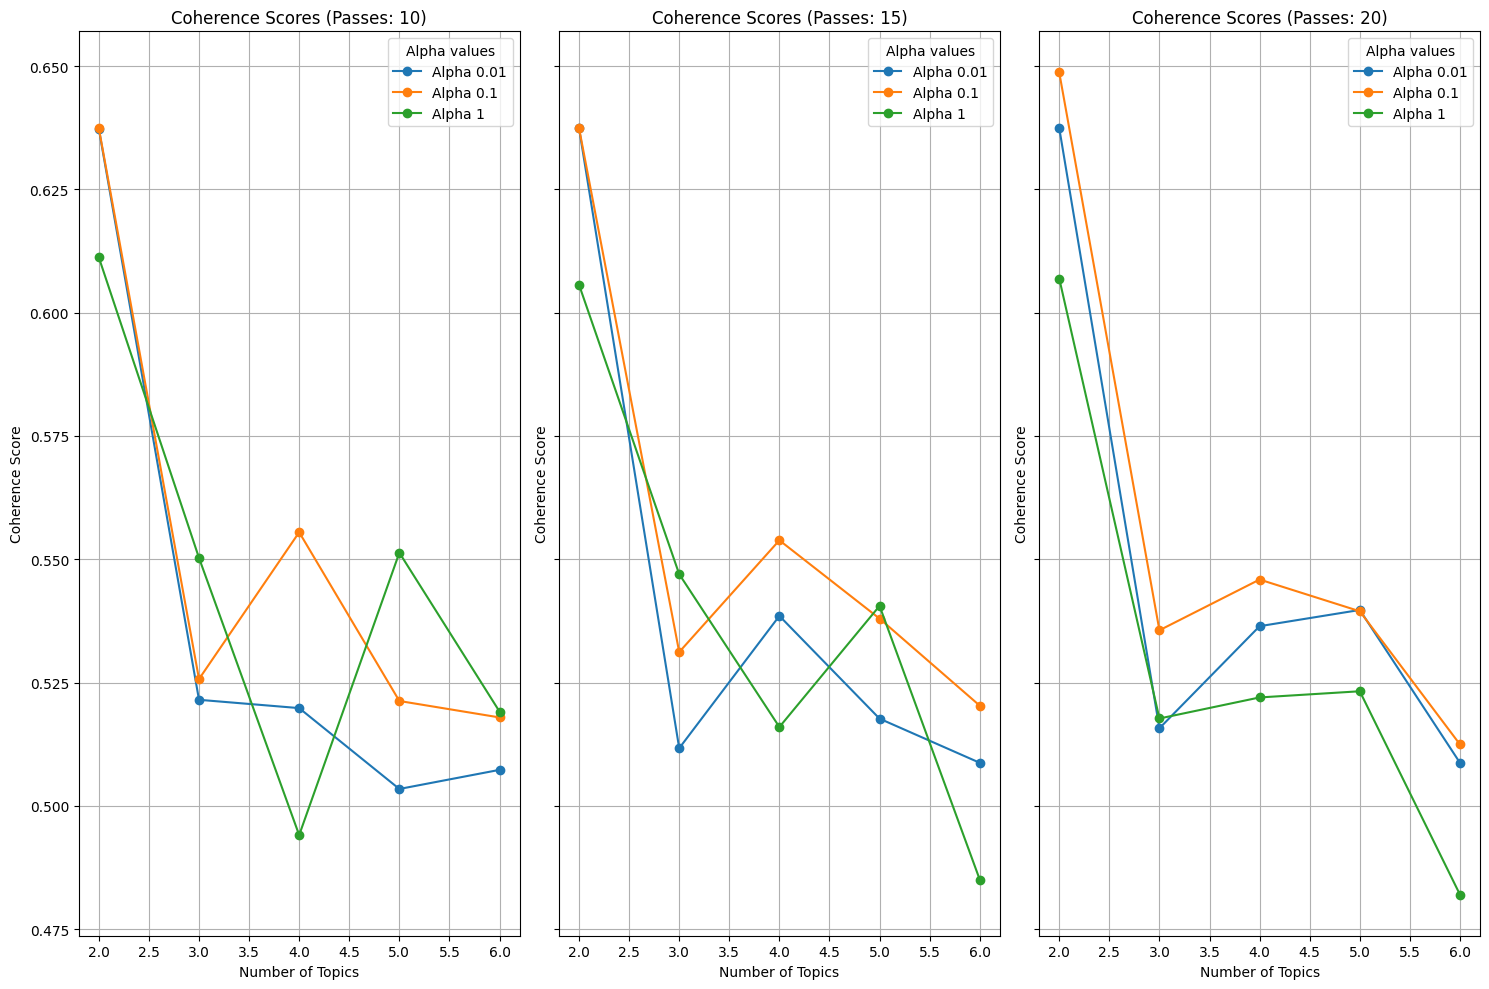

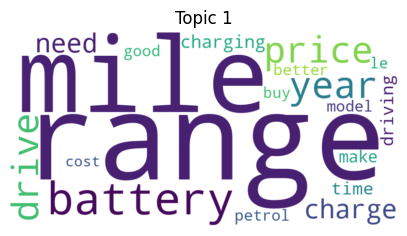

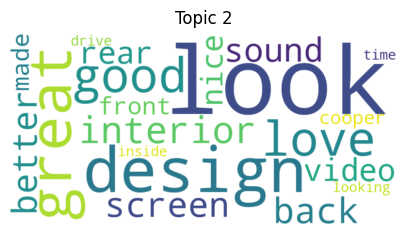

In [85]:
RANDOM_SEED = 292
# Define custom stop words
custom_stopwords = set(stopwords.words('english')).union({
    'car', 'cars', 'fiat', 'combined', 'hyundai', 'kona', 'stellantis', 'market', 'available',
    'would', 'also', 'new', 'level', 'like', 'even', 'according', 'offered', 'move',
    'one', 'content', 'information', 'interests', 'activity', 'mean', 'go', 'quit',
    'got', 'much', 'actual', 'thing', 'bit', 'see', 'think', 'yeah', 'know', 'and', 
    'way', 'come', 'presented', 'example', 'esposito', 'lee', 'torque', 'ready', 
    'since', 'still', 'two', 'sold', 'week', 'sherpa', 'around', 'use', 'um', 
    'together', 'us', 'really', 'america', 'well', 'mirafiori', 'campaign', 'north',
    'sales', 'bag', 'says', 'get', 'world', 'germani', 'belgium', 'spain',
    'uh', 'oh', 'im', 'thats', 'youre', 'weve', 'dont', 'actually', 'ahmed', 'work', 'reuters','youve','there','going',
    'gelateria', 'list', 'required', 'instead', 'added', 'inbox', 'honda', 'help', 'dedicated',
    'inform', 'news', 'group', 'report', 'couldnt', 'three', 'including', 'however', 'people','ev', 'review', 'avenger','wave','electric','mini','bmw',
    'want','cant','though','chinese'
})

# Preprocessing function
def preprocess(text):
    # Remove tabs and newlines
    text = re.sub(r'[\n\t]', ' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in custom_stopwords]
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Processing the documents
processed_docs = [preprocess(doc) for doc in combined_data['Text']]
dictionary = corpora.Dictionary(processed_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Updated coherence function to iterate over multiple parameters
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range, passes_range):
    coherence_results = []
    model_list = []
    for num_passes in passes_range:
        for alpha in alpha_range:
            for num_topics in num_topics_range:
                model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, alpha=alpha, passes=num_passes, random_state=42)
                model_list.append(model)
                coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
                coherence_results.append({
                    "model": model,
                    "alpha": alpha,
                    "num_topics": num_topics,
                    "passes": num_passes,
                    "coherence": coherencemodel.get_coherence()
                })
    return model_list, coherence_results

# Compute models and coherence
num_topics_range = range(2, 7)
alpha_range = [0.01, 0.1,  1]
passes_range = range(10, 21, 5)
model_list, coherence_results = compute_coherence_values(dictionary, bow_corpus, processed_docs, num_topics_range, alpha_range, passes_range)

# Finding and displaying the best model
optimal_result_combined = max(coherence_results, key=lambda x: x['coherence'])
print(f"Optimal settings: {optimal_result_combined['num_topics']} topics, Alpha: {optimal_result_combined['alpha']}, Passes: {optimal_result_combined['passes']}, Coherence Score: {optimal_result_combined['coherence']}")

# Plotting the coherence scores
def plot_coherence_scores(coherence_results):
    # Get unique values for passes, alphas, and number of topics
    passes_values = sorted(set(result['passes'] for result in coherence_results))
    alpha_values = sorted(set(result['alpha'] for result in coherence_results))
    num_topics_values = sorted(set(result['num_topics'] for result in coherence_results))
    
    # Determine the layout of subplots
    num_plots = len(passes_values)
    num_cols = 3  # Define the number of columns in the subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the required number of rows

    # Create subplots with horizontal layout
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), sharey=True)
    axes = axes.flatten()  # Flatten in case we have a single row

    for idx, num_passes in enumerate(passes_values):
        ax = axes[idx]
        filtered_results = [result for result in coherence_results if result['passes'] == num_passes]

        for alpha in alpha_values:
            x = [result['num_topics'] for result in filtered_results if result['alpha'] == alpha]
            y = [result['coherence'] for result in filtered_results if result['alpha'] == alpha]
            ax.plot(x, y, marker='o', label=f'Alpha {alpha}')

        ax.set_title(f"Coherence Scores (Passes: {num_passes})")
        ax.set_xlabel("Number of Topics")
        ax.set_ylabel("Coherence Score")
        ax.legend(title='Alpha values')
        ax.grid(True)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Plot coherence scores
plot_coherence_scores(coherence_results)

# Visualize topics using word clouds
optimal_model_combined = optimal_result_combined['model']
optimal_num_topics_combined = optimal_result_combined['num_topics']
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=custom_stopwords, random_state=42)
for i in range(optimal_num_topics_combined):
    plt.figure(figsize=(5, 4))
    topic_words = dict(optimal_model_combined.show_topic(i, 20))
    filtered_words = {word: freq for word, freq in topic_words.items() if word not in custom_stopwords}
    plt.imshow(wordcloud.generate_from_frequencies(filtered_words), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {i + 1}")
    plt.show()


In [86]:
lda_combined = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=optimal_num_topics_combined, alpha=optimal_result_combined['alpha'], passes=optimal_result_combined['passes'], random_state=RANDOM_SEED)

In [87]:
for idx, topic in lda_combined.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.021*"look" + 0.008*"design" + 0.005*"interior" + 0.005*"good" + 0.005*"rear" + 0.005*"love" + 0.005*"back" + 0.005*"screen" + 0.005*"front" + 0.004*"great"
Topic: 1 
Words: 0.019*"range" + 0.015*"mile" + 0.008*"battery" + 0.006*"year" + 0.006*"price" + 0.005*"drive" + 0.005*"time" + 0.005*"charge" + 0.005*"great" + 0.005*"better"


In [88]:
# Visualise topics using pyLDAvis
combined_vis = gensimvis.prepare(lda_combined, bow_corpus, dictionary, sort_topics=False)  # Ensure reproducibility by setting sort_topics to False
pyLDAvis.display(combined_vis)

In [91]:
# Get the topic distribution for each document
combined_topic_matrix = [lda_combined[doc] for doc in bow_corpus]

# Extract topic probabilities and add them as columns
combined_data['Topic 1'] = [dict(doc).get(0, 0) for doc in combined_topic_matrix]
combined_data['Topic 2'] = [dict(doc).get(1, 0) for doc in combined_topic_matrix]

# Display the table with the new topic columns
combined_data.head()

,Date,Text,Car,Topic 1,Topic 2
0,2024-05-23,you spent more time praising the car like you ...,Jeep Avenger,0.012216,0.987784
1,2024-05-18,no one talks about how you move the seat wheth...,Jeep Avenger,0.261535,0.738465
2,2024-07-02,its manualand another review states the stereo...,Jeep Avenger,0.013926,0.986074
3,2024-03-27,where is the rails for bars,Jeep Avenger,0.045539,0.954461
4,2024-03-18,im thinking about buying petrol version of jee...,Jeep Avenger,0.000000,0.994177


In [92]:
combined_data.head(15)

,Date,Text,Car,Topic 1,Topic 2
0,2024-05-23,you spent more time praising the car like you ...,Jeep Avenger,0.012216,0.987784
1,2024-05-18,no one talks about how you move the seat wheth...,Jeep Avenger,0.261535,0.738465
2,2024-07-02,its manualand another review states the stereo...,Jeep Avenger,0.013926,0.986074
3,2024-03-27,where is the rails for bars,Jeep Avenger,0.045539,0.954461
4,2024-03-18,im thinking about buying petrol version of jee...,Jeep Avenger,0.000000,0.994177
5,2024-03-20,i bought petrol,Jeep Avenger,0.045467,0.954533
6,2024-05-23,go for petrol youll be missing nothing in ter...,Jeep Avenger,0.135064,0.864936
7,2024-03-09,its a mokka stop talking crap,Jeep Avenger,0.023814,0.976186
8,2023-12-01,great design utterly ridiculous pricing vehic...,Jeep Avenger,0.000000,0.991789
9,2023-11-06,to me it looks like a vw tcross shape with a d...,Jeep Avenger,0.989122,0.010878


In [94]:
# Define a function to get the sentiment of a text
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each document
combined_data['Sentiment'] = combined_data['Text'].apply(get_sentiment)

# Determine the primary topic for each document
combined_data['Primary_Topic'] = combined_data[['Topic 1', 'Topic 2']].idxmax(axis=1)

# Calculate mean sentiment for each topic
topic_sentiment = combined_data.groupby('Primary_Topic')['Sentiment'].mean()

print(topic_sentiment)


# Calculate mean sentiment for each topic monthly
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['Month'] = combined_data['Date'].dt.to_period('M')
monthly_topic_sentiment = combined_data.groupby(['Primary_Topic', 'Month'])['Sentiment'].mean()
# Print per month, not per topic
monthly_topic_sentiment = combined_data.pivot_table(index='Month', columns='Primary_Topic', values='Sentiment', aggfunc='mean')
print(monthly_topic_sentiment)

Primary_Topic
Topic 1    0.074989
Topic 2    0.098008
Name: Sentiment, dtype: float64
Primary_Topic   Topic 1   Topic 2
Month                            
2020-03        0.115745  0.068613
2020-04        0.057335  0.094014
2020-05        0.118195  0.176312
2020-06        0.064286  0.178053
2020-07        0.054167  0.110402
2020-08        0.073818  0.131586
2020-09       -0.040278  0.087619
2020-10        0.113905  0.117793
2020-11        0.093090  0.128484
2020-12        0.091090  0.171905
2021-01        0.098439  0.181106
2021-02        0.128828  0.155588
2021-03        0.207000  0.165141
2021-04        0.089398  0.102876
2021-05        0.191667  0.218058
2021-06        0.165580  0.146231
2021-07        0.288781  0.133640
2021-08       -0.011970  0.133838
2021-09        0.048399  0.075612
2021-10        0.072433  0.137242
2021-11        0.127870  0.179824
2021-12        0.170833 -0.043158
2022-01       -0.103891  0.124622
2022-02        0.432143  0.120254
2022-03        0.073516  0.080

In [95]:
combined_data.head()

,Date,Text,Car,Topic 1,Topic 2,Sentiment,Primary_Topic,Month
0,2024-05-23,you spent more time praising the car like you ...,Jeep Avenger,0.012216,0.987784,0.200000,Topic 2,2024-05
1,2024-05-18,no one talks about how you move the seat wheth...,Jeep Avenger,0.261535,0.738465,0.500000,Topic 2,2024-05
2,2024-07-02,its manualand another review states the stereo...,Jeep Avenger,0.013926,0.986074,0.345238,Topic 2,2024-07
3,2024-03-27,where is the rails for bars,Jeep Avenger,0.045539,0.954461,0.000000,Topic 2,2024-03
4,2024-03-18,im thinking about buying petrol version of jee...,Jeep Avenger,0.000000,0.994177,0.008333,Topic 2,2024-03
